<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">3. Modelagem</span>
</div>

In [1]:
%%capture
%run 2.Pre_Processamento.ipynb

# 3.1 - K-Means

Uma vez que descobrimos o número ideal de PCA, vamos utilizar o algoritmo de agrupamento K-Means, ele funciona dividindo os dados em k grupos com base nas distâncias entre os pontos de dados e os centroides, e de forma interativa atribui cada ponto ao grupo mais próximo e recalcula os centroides até que os grupos não mudem mais.

O número de k no algoritmo k-means deve ser fornecido previamente. Este número representa o número de grupos (ou clusters) em que o conjunto de dados será dividido. Escolher o número correto de k é importante para o desempenho do algoritmo e para a interpretação dos resultados. Vamos utilizar algumas técnica e métricas para determinar o valor ideal de k.

**Método do "cotovelo":** Consiste em plotar o valor da inércia (distortion score) que é a soma das distâncias quadráticas das amostras para o centro do cluster mais próximo, em relação ao número de clusters e escolher o ponto de torção ou "cotovelo" na curva como o melhor valor de k. Esse ponto é geralmente o ponto onde a inércia começa a diminuir mais lentamente, indicando que adicionar mais clusters não vai melhorar significativamente a qualidade do agrupamento.

Quando o número de clusters aumenta, cada cluster fica menor e mais específico, permitindo que os pontos dentro de um cluster sejam mais similares entre si e menos distantes do seu centro. Isso faz com que a inércia diminua, pois, as distâncias entre as amostras e seus respectivos centros de cluster são menores, por esse motivo o valor de inércia tende a diminuir quando o número de clusters aumenta.

Em outras palavras, a inércia mede a dissimilaridade dos dados dentro do cluster. Quanto menor for a inércia, menor será a dissimilaridade, portanto, melhor será o modelo de agrupamento no algoritmo k-means. No entanto, é importante evidenciar que a inércia é uma medida de dissimilaridade interna e não considera a dissimilaridade entre os clusters.

Vamos testar e avaliar de 2 a 10 clusters para todas as métricas.

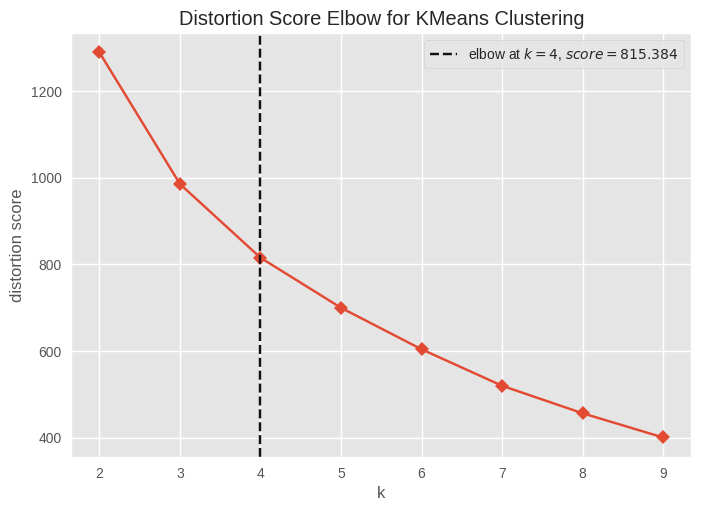

In [2]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico a escolha ideal seria com 4 clusters.

**Índice de Silhoutte:** Mede a similaridade de cada amostra com os outros pontos dentro de seu próprio cluster em relação aos outros clusters. Um valor Silhouette positivo indica que a amostra está mais próxima dos pontos dentro do seu próprio cluster do que dos outros clusters.

Valores Silhouette mais próximos de 1 indicam que as amostras estão mais bem agrupadas, enquanto valores mais próximos de -1 indicam que as amostras estão mal agrupadas e talvez deveriam estar em outro cluster. Valores próximos de 0 indicam que a amostra está "na fronteira" entre dois clusters.

A métrica Silhouette é útil para avaliar a qualidade do agrupamento em relação aos outros clusters, e não apenas em relação ao seu próprio cluster, e é uma boa maneira de determinar o número correto de clusters a ser escolhido.

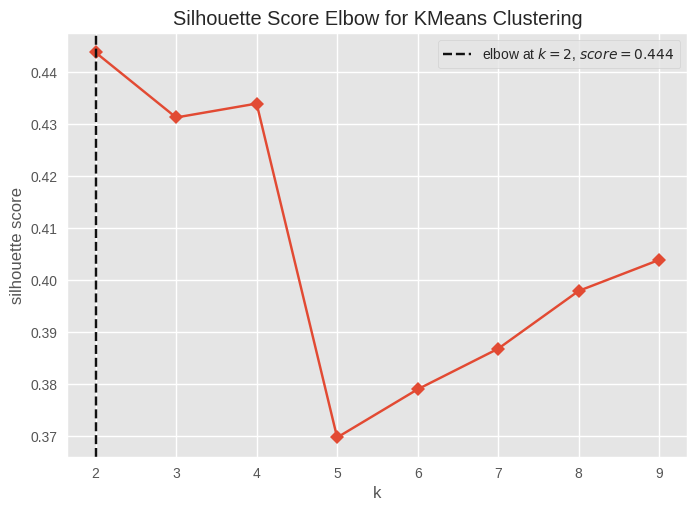

In [3]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico do Índice de Silhoutte a melhor escolha seria com 2 clusters.

**Índice de Calinski-Harabasz:** Mede a relação entre a variação dentro dos agrupamentos (intra-cluster) e a variação entre os agrupamentos (inter-cluster). Ou seja, ela é baseada na razão entre a soma das distâncias entre os pontos de um grupo e a média do grupo e a soma das distâncias entre cada ponto e a média geral dos dados. Quanto maior o valor desta métrica, melhor é o agrupamento, pois indica que os clusters são mais distintos e compactos, enquanto um valor baixo indica que os clusters são sobrepostos e dispersos.

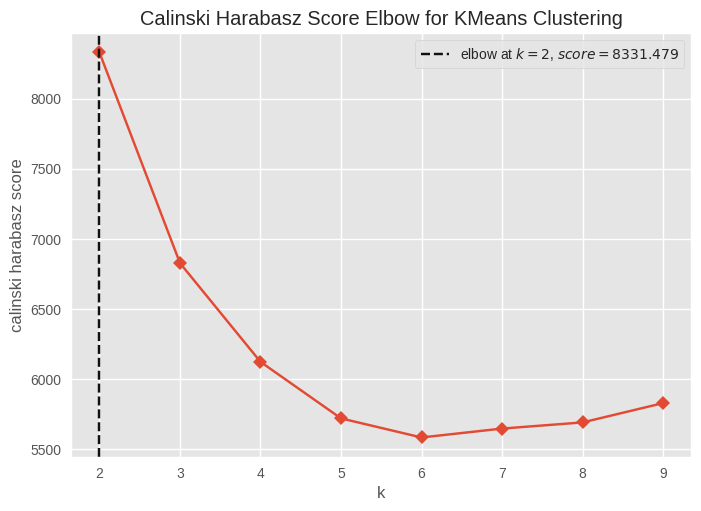

In [4]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico do Índice de Calinski-Harabasz a melhor escolha também seria com 2 clusters.

**Índice de Davies-Bouldin:**  É uma medida de similaridade entre as amostras de dados em um agrupamento. É calculada como a média das distâncias entre cada ponto de dados e o centro do cluster mais próximo. Geralmente quanto menor o valor de Davies-Bouldin, melhor é o modelo de agrupamento. Isso ocorre porque o valor de Davies-Bouldin mede a similaridade entre cada cluster e seus vizinhos mais próximos, e quanto menor for esse valor, menor será a similaridade, portanto, melhor será a separação entre os clusters.

Os gráficos nos deram uma boa noção, mas vamos avaliar todos os valores e colocar em formato de DataFrame para um melhor entendimento geral.

In [5]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 18)
    pred = kmeans.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Resultados
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin,
    'Inertia': inertia})

result.sort_values('Silhouette', ascending=False)

,Clusters,Silhouette,Calinski Harabasz,Davies Bouldin,Inertia
0,2,0.443808,8331.478560,0.939435,1289.072718
2,4,0.433986,6121.705972,1.005715,815.386780
1,3,0.431311,6827.227169,1.131881,985.411788
7,9,0.403950,5827.133646,0.874072,400.593504
6,8,0.397981,5689.164164,0.938710,456.438621
8,10,0.389997,5724.592723,0.894033,368.068772
5,7,0.386876,5645.241729,1.006785,519.949188
4,6,0.379076,5581.639366,1.100599,604.139368
3,5,0.369813,5717.935353,1.120999,699.838150


As métricas de avaliação para 2, 3 e 4 clusters apresentaram os melhores resultados, mas não diferem muito entre si, vamos verificar como se comporta a distribuição dos clusters em termos do coeficiente de Silhouette.

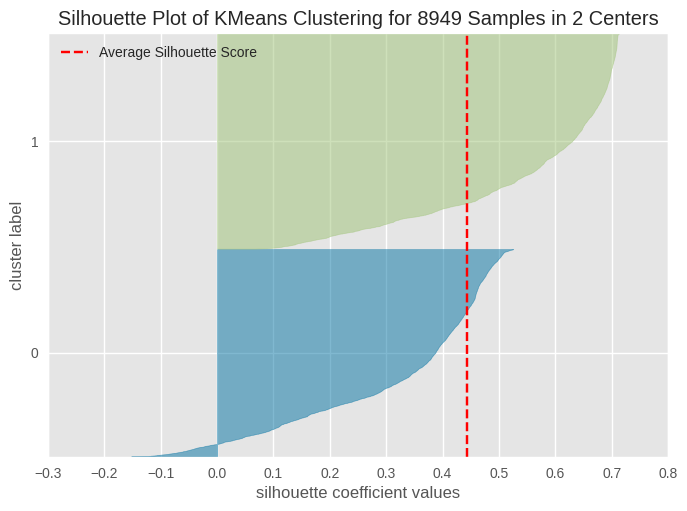

In [6]:
# Plot
model = KMeans(n_clusters=2, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

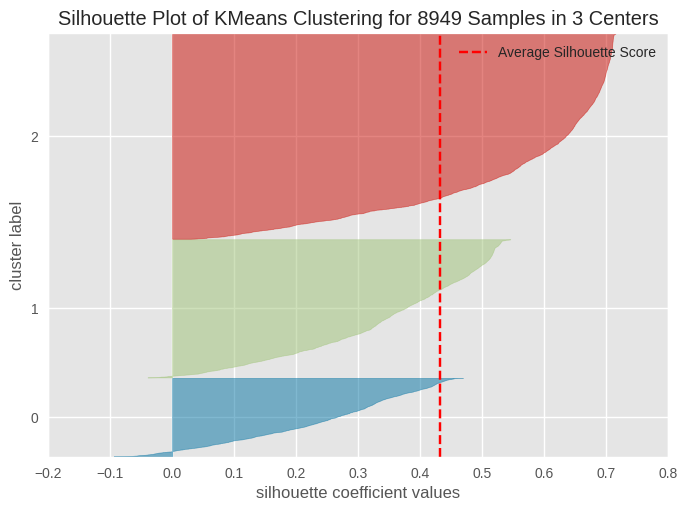

In [7]:
# Plot
model = KMeans(n_clusters=3, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

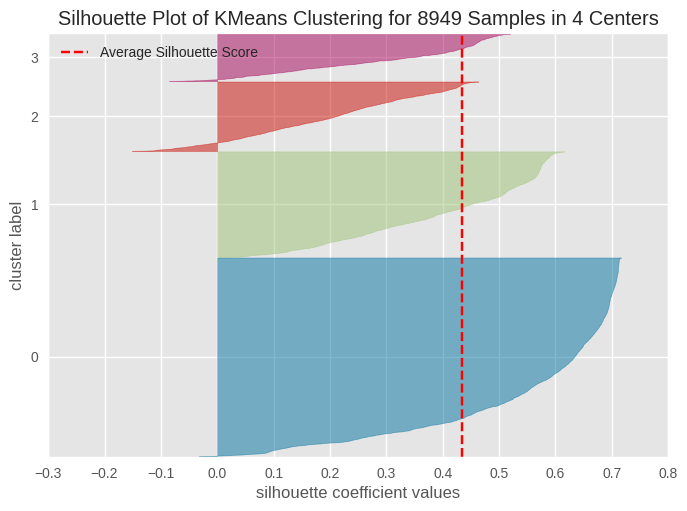

In [8]:
# Plot
model = KMeans(n_clusters=4, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Em todas as situações cada amostra de clusters ficou acima da média no coeficiente de Silhouette e apresentaram um equilíbrio plausível nas distribuições.

Para a escolha final do número de clusters no algoritmo K-Means vamos plotar um gráfico de dispersão para 2, 3, e 4 clusters com às três features mais valiosas para a tarefa de segmentação de clientes de cartões de crédito: PURCHASES, BALANCE e CREDIT_LIMIT, e averiguar o comportamento de cada.

2 Clusters

In [9]:
# Aplica o algoritmo K-Means para 2 Clusters
kmeans1 = KMeans(n_clusters=2, random_state=18)
kmeans1.fit(df_pca1)
labels1 = kmeans1.labels_

In [10]:
# Cópia do Dataframe Original
df1 = df.copy()

In [11]:
# Anexar o resultado dos clusters ao Dataframe
df1['cluster'] = labels1

In [12]:
# Quantidade de cada clusters
df1['cluster'].value_counts()

1    4557
0    4392
Name: cluster, dtype: int64

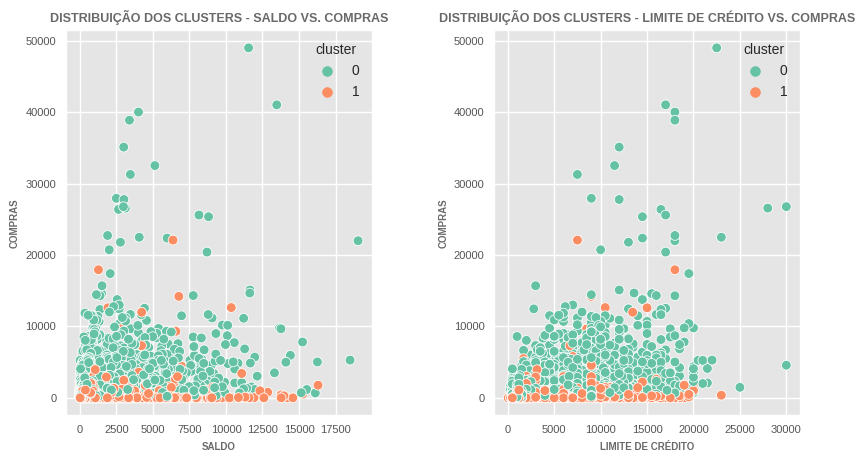

In [13]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

3 Clusters

In [14]:
# Aplica o algoritmo K-Means para 3 Clusters
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca1)
labels2 = kmeans2.labels_

In [15]:
# Cópia do Dataframe Original
df2 = df.copy()

In [16]:
# Anexar o resultado dos clusters ao Dataframe
df2['cluster'] = labels2

In [17]:
# Quantidade de cada clusters
df2['cluster'].value_counts()

2    4352
1    2933
0    1664
Name: cluster, dtype: int64

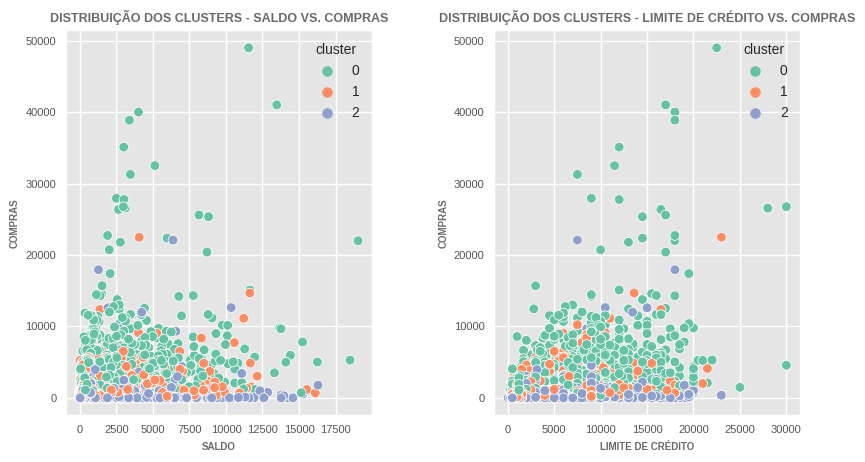

In [18]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

4 Clusters

In [19]:
# Aplica o algoritmo K-Means para 3 Clusters
kmeans3 = KMeans(n_clusters=4, random_state=18)
kmeans3.fit(df_pca1)
labels3 = kmeans3.labels_

In [20]:
# Cópia do Dataframe Original
df3 = df.copy()

In [21]:
# Anexar o resultado dos clusters ao Dataframe
df3['cluster'] = labels3

In [22]:
# Quantidade de cada clusters
df3['cluster'].value_counts()

0    4224
1    2245
2    1475
3    1005
Name: cluster, dtype: int64

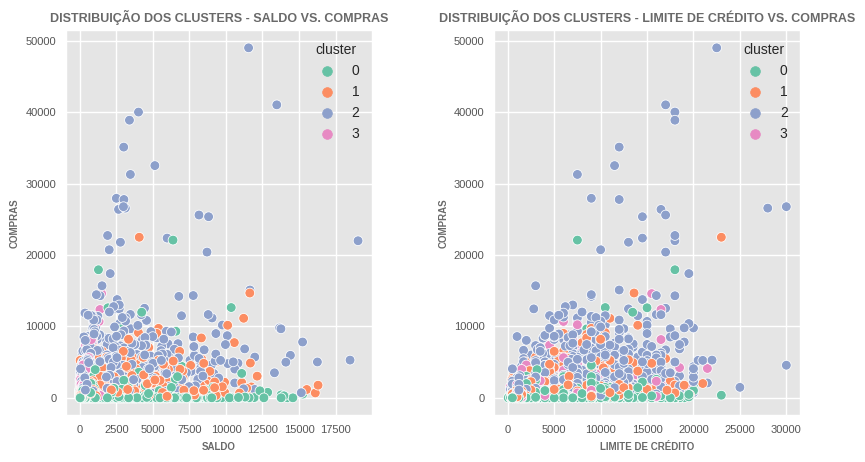

In [23]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df3, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df3, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Para 4 clusters não é possível identificar visualmente de forma clara o último cluster e apresenta uma distribuição mais confusa.

2 e 3 clusters apresentam uma distribuição mais ordenada e é possível verificar visualmente uma certa distinção entre os clusters. Vamos optar por 3 clusters, pois podemos obter uma segmentação mais detalhada sobre as características dos clientes, por exemplo, pelo gráfico podemos notar que indivíduos do grupo 0, 1 e 2 são os que realizam mais compras na respectiva ordem.

Anteriormente encontramos que o melhor número de PCAs para os dados foram 4, agora vamos utilizar PCAs igual a 2 com o intuito de visualizar os dados através de um gráfico de 2 dimensões de modo que o agrupamento seja visualizado de maneira mais ordenada.

In [24]:
# Aplica o PCA a 2 componentes para visualização
pca2 = PCA(n_components= 2, random_state=18)
df_pca2 = pca2.fit_transform(df_norm)
df_pca2.shape

(8949, 2)

In [25]:
# Algoritmo K-Means para 3 Clusters com 2 PCAs
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca2)
labels4 = kmeans2.labels_

In [26]:
# Cópia do Dataframe com 2 PCAs
df_pca2_kmn = df_pca2.copy()

In [27]:
# Dataframe para dois componentes
df_pca2_kmn = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_kmn = pd.concat([df_pca2_kmn, pd.DataFrame({'cluster':labels4})], axis=1)

In [28]:
# Tabela com 2 PCAs
df_pca2_kmn.head()

,pca1,pca2,cluster
0,-0.323287,-0.093937,0
1,-0.448162,-0.030871,0
2,0.176913,0.629412,2
3,-0.411648,0.028061,0
4,-0.397398,0.023580,0


In [29]:
# Quantidade de cada clusters com 2 PCAs
df_pca2_kmn['cluster'].value_counts()

0    4328
1    2856
2    1765
Name: cluster, dtype: int64

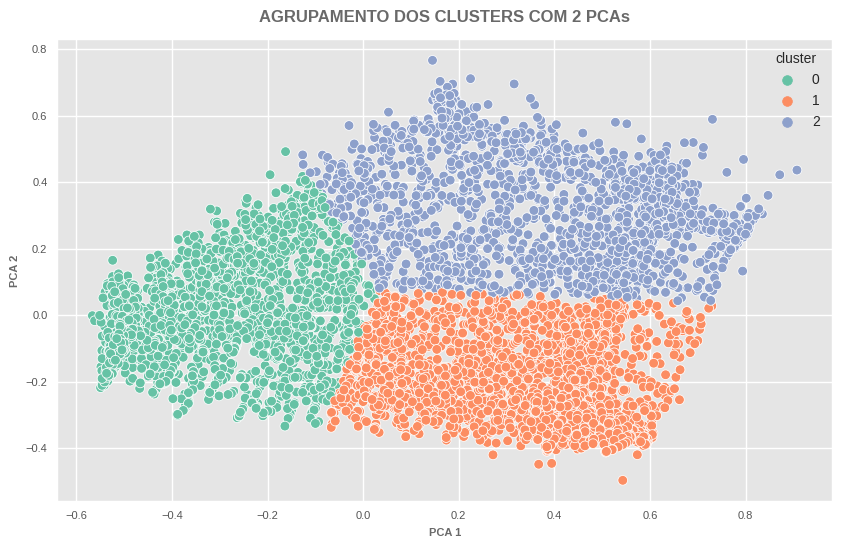

In [30]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_kmn, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [31]:
# Modelo K-Means final

# Métricas
metricas = []

kmeans = KMeans(n_clusters= 3, random_state = 18)
pred = kmeans.fit_predict(df_pca1)

modelo = 'K-Means'
n_clusters = 3
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_kmn

,Modelo,N° Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,K-Means,3,0.431311,6827.227169,1.131881


# 3.2 - DBSCAN

O algoritmo DBSCAN define clusters baseado em densidade, isto é, a distância entre os pontos. O parâmetro eps é a distância máxima que um ponto pode estar de outro ponto para que os dois pontos possam ser considerados parte do mesmo cluster. Quanto maior o valor de eps, mais pontos serão incluídos em um cluster e, portanto, os clusters serão mais amplos. Por outro lado, quanto menor o valor de eps menos pontos serão incluídos em um cluster e, portanto, os clusters serão mais estreitos.

A distância entre os pontos mais próximos pode ser usada como uma estimativa para o valor de eps. Isso é onde entra o NearestNeighbors, um algoritmo de aprendizado não supervisionado que pode ser usado para calcular as distâncias entre os k vizinhos mais próximos de cada ponto. Ao plotar essas distâncias em ordem crescente, é possível ver o ponto onde o gráfico começa a crescer rapidamente, o que indica que os clusters estão se formando. Esse ponto pode ser usado como uma estimativa para o valor de eps.

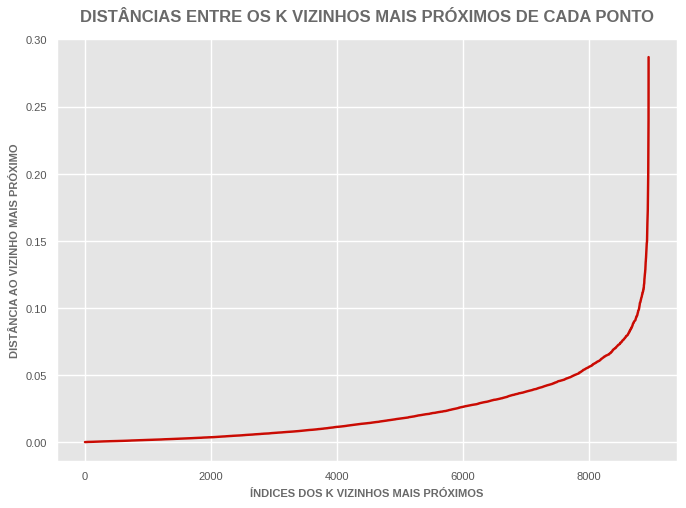

In [32]:
# NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(df_pca1)

# Calculando as distâncias e os índices dos k vizinhos mais próximos
distances, indices = nbrs.kneighbors(df_pca1)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTÂNCIAS ENTRE OS K VIZINHOS MAIS PRÓXIMOS DE CADA PONTO', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('ÍNDICES DOS K VIZINHOS MAIS PRÓXIMOS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTÂNCIA AO VIZINHO MAIS PRÓXIMO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Neste exemplo, o objeto NearestNeighbors é usado para calcular as distâncias entre os pontos mais próximos. O gráfico gerado mostra essas distâncias ordenadas, permitindo a escolha de um valor de eps adequado. O ponto onde o gráfico começa a crescer rapidamente é um bom candidato para o valor de eps, pois indica que os clusters estão se formando. Deste modo, podemos perceber que o valor de eps onde o ocorre a crescimento do gráfico é com o valor de 0.05.

Entretanto, é importante considerar que o valor de min_samples interage com o valor de eps, então é necessário testar diferentes combinações de valores de eps e min_samples, vamos utilizar o GridSearchCV para encontrar a melhor combinação entre estes dois parâmetros.

In [33]:
# Define o espaço de busca de parâmetros
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

# Cria o objeto DBSCAN
dbscan = DBSCAN()

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

# Executa a busca de grade
grid_search.fit(df_pca1)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'eps': 0.01, 'min_samples': 2}


In [34]:
# Instancia do DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# obtendo os rótulos dos clusters
labels = dbscan.labels_

In [35]:
# Número de clusters em rótulos, ignorando o ruído, se presente
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

Número estimado de clusters: 607
Número estimado de pontos de ruído: 5173


Número de clusters inconcebível para se realizar uma análise de segmentação.

Vamos verificar as melhores combinações de eps e min_samples através de um loop aninhado.

In [37]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

eps =[]
min_samples = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters = []
metricas_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
        davies_bouldin = davies_bouldin_score(df_pca1, pred)
        metricas_dbscan.append((eps, min_sample, silhouette, calinski_harabasz, davies_bouldin, len(set(dbscan.labels_))) )

df_dbscan = pd.DataFrame(metricas_dbscan, columns=['Eps', 'Min Samples', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'N° Clusters'])
df_dbscan.sort_values('Silhouette', ascending=False).head(10)

,Eps,Min Samples,Silhouette,Calinski Harabasz,Davies Bouldin,N° Clusters
46,0.0775,52,0.160683,1925.648615,1.365359,5
55,0.1000,37,0.104890,416.732471,1.865837,4
56,0.1000,42,0.103872,423.532283,1.858772,4
57,0.1000,47,0.103200,428.275735,1.852370,4
45,0.0775,47,0.079085,658.138477,2.073393,3
58,0.1000,52,0.078401,399.019226,1.634520,5
59,0.1000,57,0.077118,485.435528,1.801495,4
50,0.1000,12,0.060234,135.716906,1.784752,5
44,0.0775,42,0.057780,502.188111,1.742273,4
43,0.0775,37,0.055484,395.452513,1.569016,5


A melhor combinação foi eps=0.0775 e min_samples = 52.

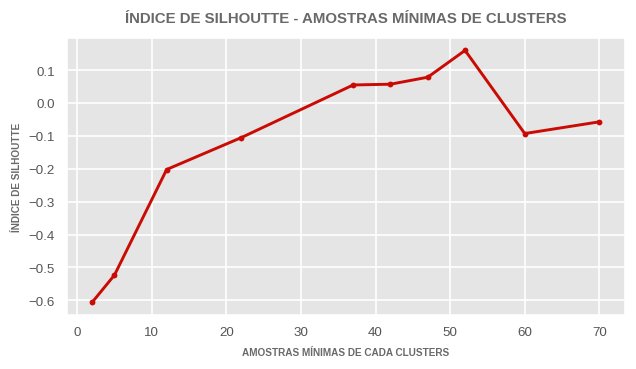

In [38]:
# Plot 

silhoutte_coefs = []

for min_points in [2, 5, 12, 22, 37, 42, 47, 52, 60, 70]:
    db = DBSCAN(eps = 0.0775, min_samples = min_points)
    db.fit(df_pca1)
    silhoutte_coefs.append(metrics.silhouette_score(df_pca1, db.labels_))
    
plt.figure(figsize = (6, 3), dpi = 120)
plt.plot([2, 5, 12, 22, 37, 42, 47, 52, 60, 70], silhoutte_coefs, color = 'r', marker = '.')
plt.title('ÍNDICE DE SILHOUTTE - AMOSTRAS MÍNIMAS DE CLUSTERS', fontsize = 9, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('AMOSTRAS MÍNIMAS DE CADA CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('ÍNDICE DE SILHOUTTE', color = 'dimgrey', fontweight = 'bold', fontsize = 6)
plt.show();

In [39]:
# Instancia do DBSCAN
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# Obtendo os rótulos dos clusters
dbscan_labels = dbscan.labels_

In [40]:
# Número de clusters em rótulos, ignorando o ruído, se presente
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

Número estimado de clusters: 4
Número estimado de pontos de ruído: 3937


Vamos verificar a distribuição dos clusters com as features mais elementares para o problema de negócio.

In [41]:
# Cópia do Dataframe original
df_bscan = df.copy()

In [42]:
# Anexar o resultado dos clusters do DBSCAN ao Dataframe
df_bscan['cluster'] = dbscan_labels

In [43]:
# Quantidade de cada clusters
df_bscan['cluster'].value_counts()

-1    3937
 1    3257
 2    1583
 0     104
 3      68
Name: cluster, dtype: int64

OBS: O valor de -1 representa amostras que não foram atribuídas a nenhum cluster.

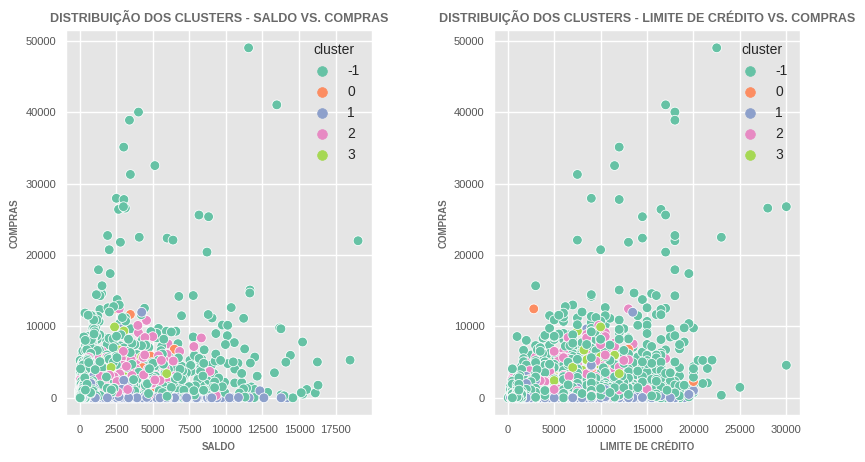

In [44]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_bscan, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_bscan, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [45]:
# Cópia do Dataframe com 2 PCAs
df_pca2_db = df_pca2.copy()

In [46]:
# Dataframe para dois componentes
df_pca2_db = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_db = pd.concat([df_pca2_db, pd.DataFrame({'cluster':dbscan_labels})], axis=1)

In [47]:
# Tabela com 2 PCAs
df_pca2_db.head()

,pca1,pca2,cluster
0,-0.323287,-0.093937,-1
1,-0.448162,-0.030871,1
2,0.176913,0.629412,0
3,-0.411648,0.028061,1
4,-0.397398,0.023580,1


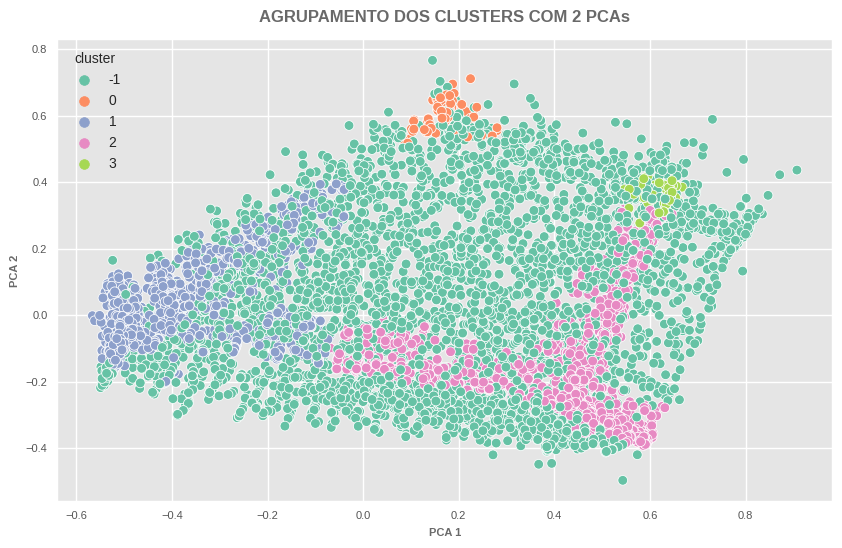

In [48]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_db, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Percebe-se que o algoritmo DBSCAN é melhor em detectar outliers.

In [49]:
# Modelo DBSCAN final

# Métricas
metricas = []

#dbscan = DBSCAN(eps=0.0775, min_samples=52)
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# obtendo os rótulos dos clusters
#dbscan_labels = dbscan.labels_
pred = dbscan.labels_

modelo = 'DBSCAN'
n_clusters = 4
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_db = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_db

,Modelo,N° Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,DBSCAN,4,0.160683,1925.648615,1.365359


# 3.3 - Hierarchical Clustering

O agrupamento hierárquico aglomerativo é baseado em hierarquia que começa com cada ponto de dados como um cluster individual e, em seguida, combina gradualmente os clusters mais próximos até que todos os pontos de dados estejam agrupados em um único cluster. Isso é feito calculando a distância entre os clusters e escolhendo aquele com a menor distância para combinar. Esse processo é repetido até que todos os pontos de dados estejam agrupados em um único cluster ou até que o número desejado de clusters seja alcançado.

Uma maneira simples e intuitiva de determinar o número de clusters em um agrupamento hierárquico é traçar uma linha horizontal ao longo do dendrograma e dividir em um número específico de seções, cada uma representando um cluster.

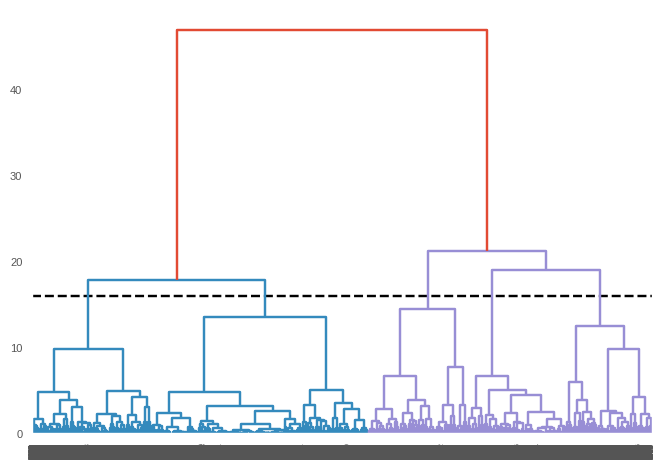

In [50]:
# Plot

dend = linkage(df_pca1, 'ward')
plt.axhline(y=16, color='black', linestyle='--')
dendrogram(dend)
plt.show();

Através do Dendograma 5 clusters parece ser uma escolha razoável. Entretanto, vamos verificar outras métricas de agrupamento.

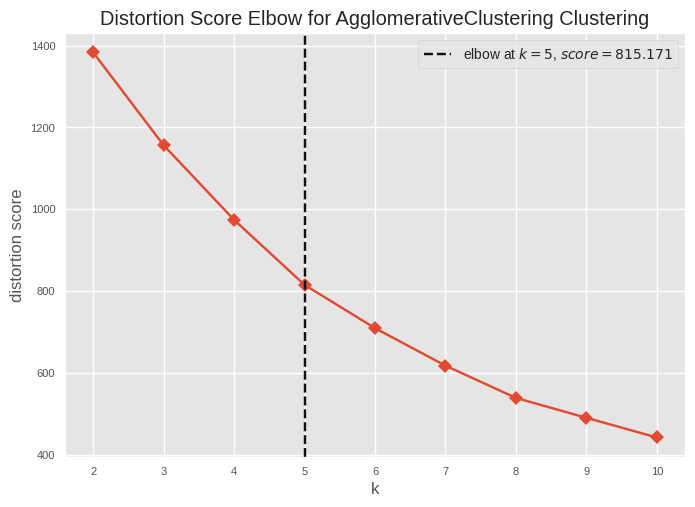

In [51]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

O Método "cotovelo" também indicou 5 como o número ideal de clusters.

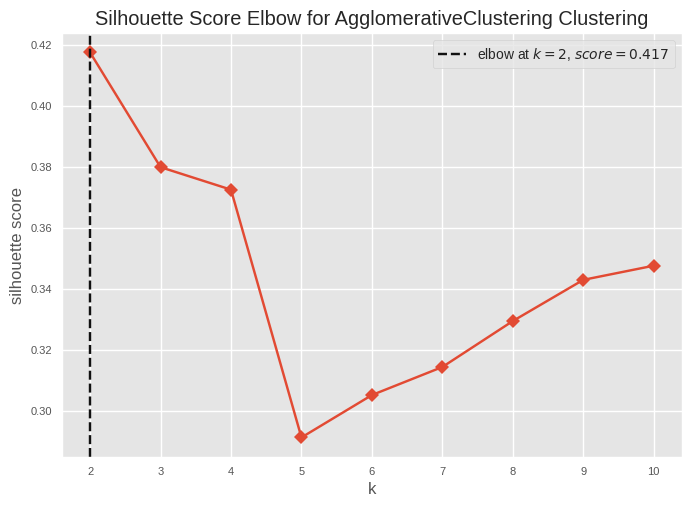

In [52]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='silhouette', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Mediante o índice de Silhoutte, 2 clusters apresenta-se como sendo o melhor resultado e surpreendentemente, diferente das outras duas outras métricas anteriores, 5 clusters afigurou-se como a pior escolha.

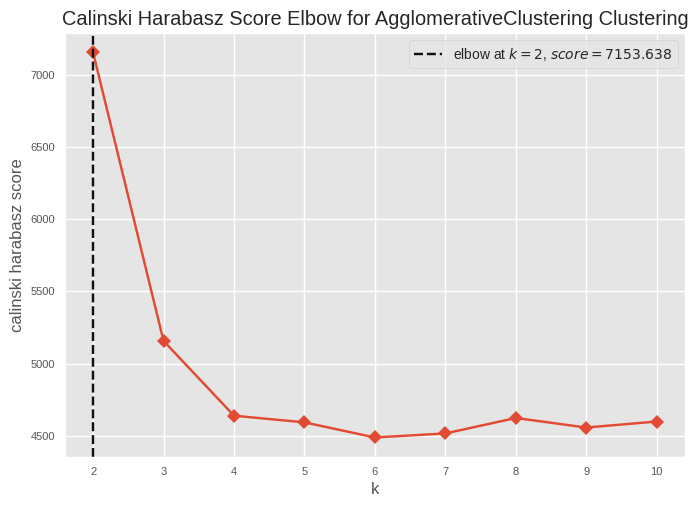

In [53]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

O índice de Calinski-Harabasz também assinala o melhor resultado como sendo igual a 2 clusters.

Vamos conferir por meio de uma tabela todas as métricas (incluindo o índice de Davies-Bouldin) de 2 a 10 clusters.

In [54]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    pred = ac.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Resultados
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

,Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,2,0.417459,7153.638491,1.030964
1,3,0.379865,5156.439859,1.317517
2,4,0.372482,4638.606194,1.117199
8,10,0.347565,4598.444426,1.004862
7,9,0.342922,4556.663339,1.054034
6,8,0.329422,4622.830768,1.041481
5,7,0.314361,4515.833397,1.043774
4,6,0.305166,4487.907964,1.124842
3,5,0.291257,4592.553055,1.220793


Agora podemos ratificar de maneira evidente que 2 clusters realmente apresentam os melhores valores. Apesar disso, o algoritmo K-Means ostenta um resultado superior de agrupamento.

In [55]:
# Cria um modelo de agrupamento hierárquico
hc = AgglomerativeClustering(n_clusters=2)

# Ajusta o modelo aos dados
hc.fit(df_pca1)

# Imprime os rótulos de cada exemplo
hc_labels = hc.labels_

In [56]:
# Cópia do Dataframe original
df_hc = df.copy()

In [57]:
# Anexar o resultado dos clusters do agrupamento hierárquico ao Dataframe
df_hc['cluster'] = hc_labels

In [58]:
# Quantidade de cada clusters
df_hc['cluster'].value_counts()

1    4860
0    4089
Name: cluster, dtype: int64

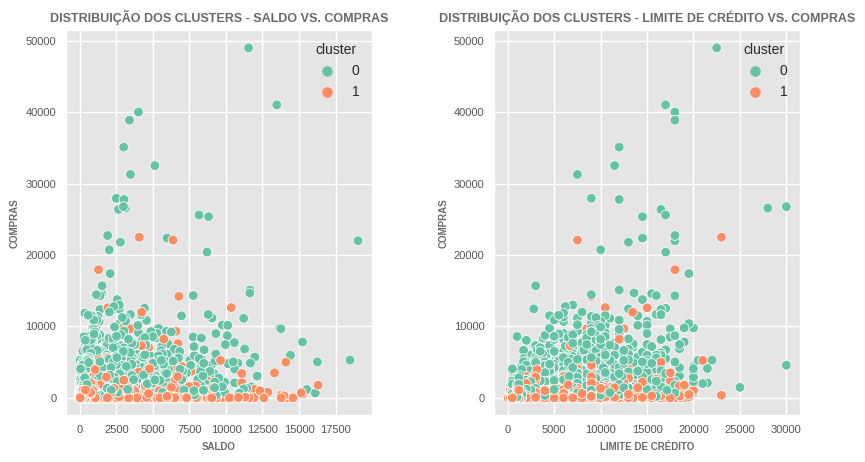

In [59]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_hc, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_hc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [60]:
# Cópia do Dataframe com 2 PCAs
df_pca2_db = df_pca2.copy()

In [61]:
# Dataframe para dois componentes
df_pca2_hc = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_hc = pd.concat([df_pca2_hc, pd.DataFrame({'cluster':hc_labels})], axis=1)

In [62]:
# Tabela com 2 PCAs
df_pca2_hc.head()

,pca1,pca2,cluster
0,-0.323287,-0.093937,1
1,-0.448162,-0.030871,1
2,0.176913,0.629412,0
3,-0.411648,0.028061,1
4,-0.397398,0.023580,1


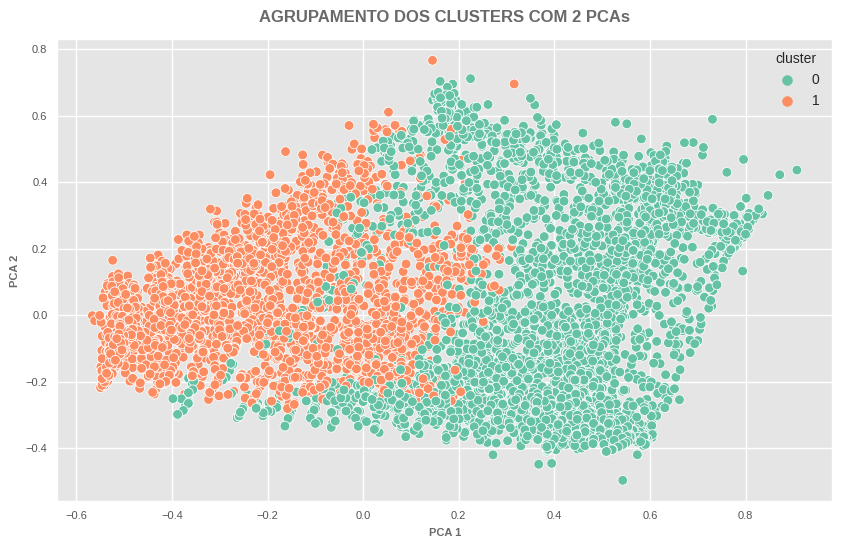

In [63]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_hc, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [64]:
# Modelo Hierarchical Clustering final

# Métricas
metricas = []

hc = AgglomerativeClustering(n_clusters=2)
pred = hc.fit_predict(df_pca1)

modelo = 'Hierarchical Clustering'
n_clusters = 2
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_hc = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_hc

,Modelo,N° Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,Hierarchical Clustering,2,0.417459,7153.638491,1.030964


Vamos comparar as métricas de todos os algoritmos.

In [65]:
# Tabela de comparação entre os algoritmos 
df_comp = pd.concat([df_kmn, df_db, df_hc])
df_comp.sort_values('Silhouette', ascending=False)

,Modelo,N° Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,K-Means,3,0.431311,6827.227169,1.131881
0,Hierarchical Clustering,2,0.417459,7153.638491,1.030964
0,DBSCAN,4,0.160683,1925.648615,1.365359


Com base não só no resultado das métricas mas também na interpretação dos gráficos de distribuição dos clusters, o algoritmo K-Means com 3 clusters me parece ser a escolha mais plausível para o problema de segmentação de clientes de cartão de crédito.